# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

%pip install matplotlib seaborn --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df=pd.read_csv('porter_data_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [3]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df.actual_delivery_time = pd.to_datetime(df.actual_delivery_time, format='%Y-%m-%d %H:%M:%S')
df.created_at = pd.to_datetime(df.created_at, format='%Y-%m-%d %H:%M:%S')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [5]:
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [6]:
# Convert categorical features to category type

print(df.nunique())

market_id                        6
created_at                  162649
actual_delivery_time        160344
store_primary_category          73
order_protocol                   7
total_items                     54
subtotal                      8182
num_distinct_items              20
min_item_price                2251
max_item_price                2585
total_onshift_dashers          172
total_busy_dashers             158
total_outstanding_orders       281
distance                      1318
dtype: int64


In [7]:
df.market_id=df.market_id.astype('category')
df.order_protocol=df.order_protocol.astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [9]:
# Calculate time taken in minutes
df['time_taken'] = (df.actual_delivery_time - df.created_at).dt.total_seconds() / 60

In [10]:
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [12]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_at_hour'] = df.created_at.dt.hour
df['created_at_day_of_week'] = df.created_at.dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = (df.created_at_day_of_week >= 5).astype(int)

# Create a categorical feature 'isNight'
df['isNight'] = ((df.created_at_hour >= 18) | (df.created_at_hour < 6)).astype(int)

In [13]:
df.isNight.value_counts()

isNight
1    169009
0      6768
Name: count, dtype: int64

In [14]:
# Drop unnecessary columns
df = df.drop(columns=['created_at', 'actual_delivery_time', 'created_at_hour', 'created_at_day_of_week'])

In [15]:
df.head()

market_id  store_primary_category order_protocol  total_items  subtotal  \
0       1.0                       4            1.0            4      3441   
1       2.0                      46            2.0            1      1900   
2       2.0                      36            3.0            4      4771   
3       1.0                      38            1.0            1      1525   
4       1.0                      38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  \
0                14.0                      21.0     34.44        47.0   
1                 2.0                       2.0     27.60        44.0   
2                 6.0                      18.0     11.56        55.0   
3                 6.0                       8.0     31.80        59.0   
4                 5.0                       7.0      8.20        46.0   

   isWeekend  isNight  
0          0        1  
1          0        1  
2          0        1  
3          0        1  
4          0        1

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [16]:
# Define target variable (y) and features (X)

y= df['time_taken']
X = df.drop(columns=['time_taken'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [17]:
# Split data into training and testing sets

%pip install scikit-learn --quiet

from sklearn.model_selection import train_test_split
np.random.seed(0)
train_df, test_df = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)
# Define the features and target variable for training and testing sets
# Ensure 'time_taken' is included in the training and testing sets
X_train = train_df.drop(columns=['time_taken']) 
y_train = train_df['time_taken']
X_test = test_df.drop(columns=['time_taken'])   
y_test = test_df['time_taken']
# Display the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")
# Display the first few rows of the training set
X_train.head()


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Training set shape: (123043, 14), Testing set shape: (52734, 14)


market_id  store_primary_category order_protocol  total_items  \
94746        4.0                      24            5.0            2   
173338       4.0                      72            5.0            1   
37592        4.0                      55            5.0            1   
42763        2.0                      28            4.0            6   
27506        2.0                      72            1.0            3   

        subtotal  num_distinct_items  min_item_price  max_item_price  \
94746       1790                   2             795             995   
173338       845                   1             795             795   
37592       1900                   1            1200            1200   
42763        463                   3               0             299   
27506       3500                   3             600            1200   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
94746                    10.0                 9.0                      15.0   
173338                  134.0                76.0                     136.0   
37592                    21.0                21.0                      28.0   
42763                    98.0                87.0                     129.0   
27506                     7.0                13.0                      17.0   

        distance  isWeekend  isNight  
94746      18.04          0        1  
173338     24.28          1        1  
37592      28.24          1        1  
42763      13.88          1        1  
27506       8.00          1        1

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [18]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price','total_onshift_dashers', 'total_busy_dashers','total_outstanding_orders','distance','time_taken']
categorical_cols = ['market_id', 'order_protocol', 'isWeekend', 'isNight','store_primary_category']

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken']
Categorical Columns: ['market_id', 'order_protocol', 'isWeekend', 'isNight', 'store_primary_category']


In [19]:
train_df.head()

market_id  store_primary_category order_protocol  total_items  \
94746        4.0                      24            5.0            2   
173338       4.0                      72            5.0            1   
37592        4.0                      55            5.0            1   
42763        2.0                      28            4.0            6   
27506        2.0                      72            1.0            3   

        subtotal  num_distinct_items  min_item_price  max_item_price  \
94746       1790                   2             795             995   
173338       845                   1             795             795   
37592       1900                   1            1200            1200   
42763        463                   3               0             299   
27506       3500                   3             600            1200   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
94746                    10.0                 9.0                      15.0   
173338                  134.0                76.0                     136.0   
37592                    21.0                21.0                      28.0   
42763                    98.0                87.0                     129.0   
27506                     7.0                13.0                      17.0   

        distance  time_taken  isWeekend  isNight  
94746      18.04        41.0          0        1  
173338     24.28        41.0          1        1  
37592      28.24        44.0          1        1  
42763      13.88        40.0          1        1  
27506       8.00        44.0          1        1

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

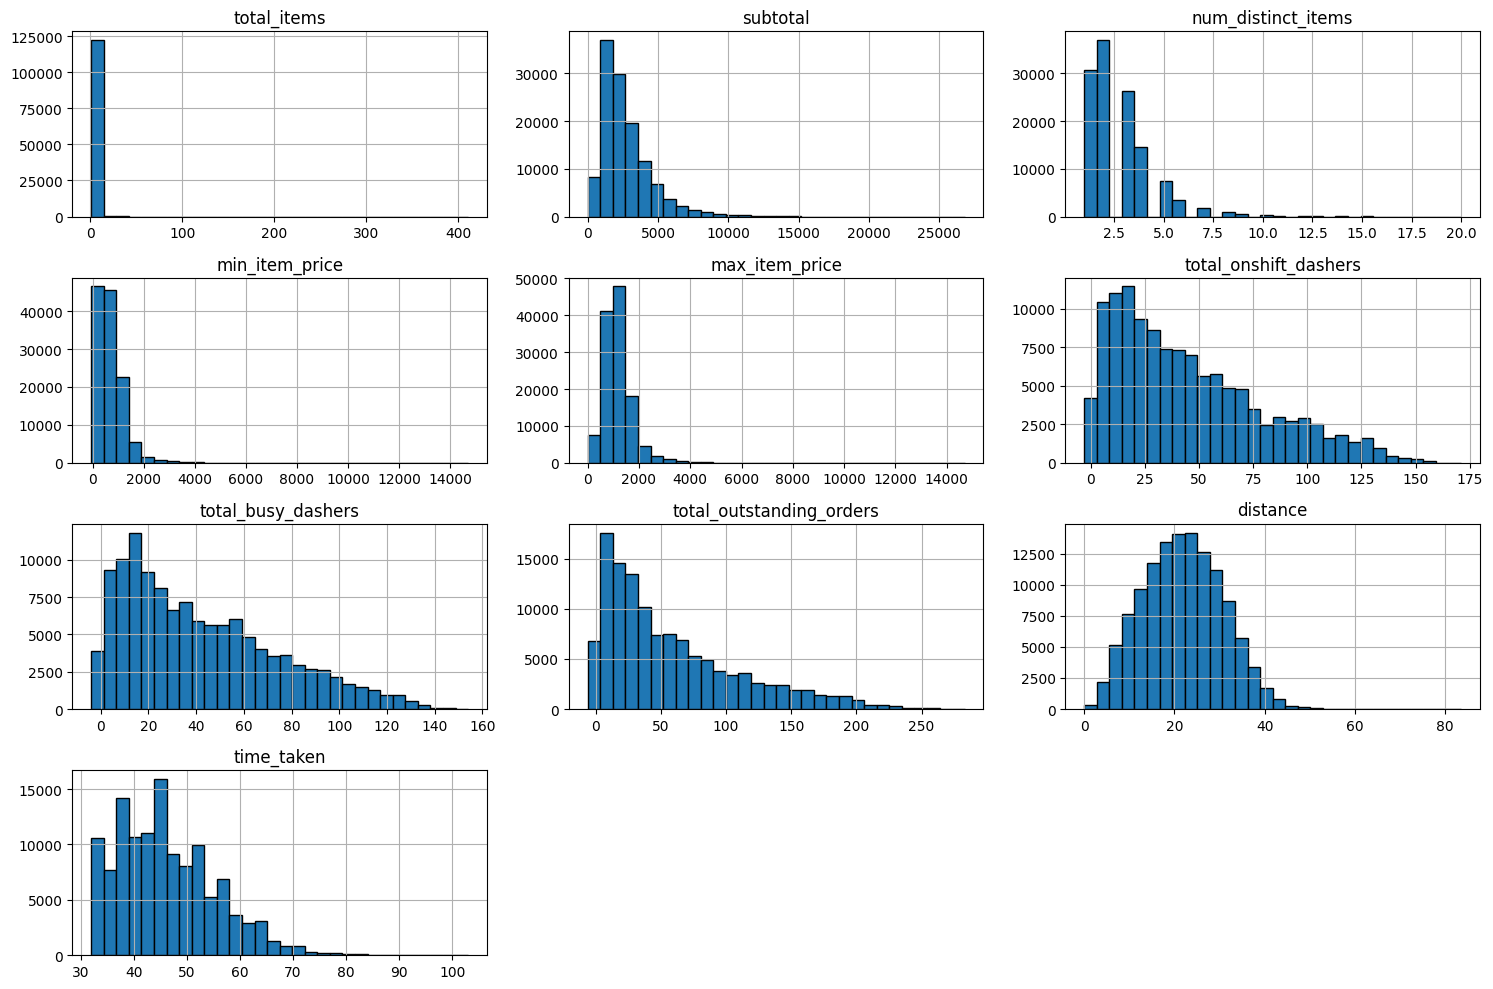

In [20]:
# Plot distributions for all numerical columns
train_df[numerical_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()  


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

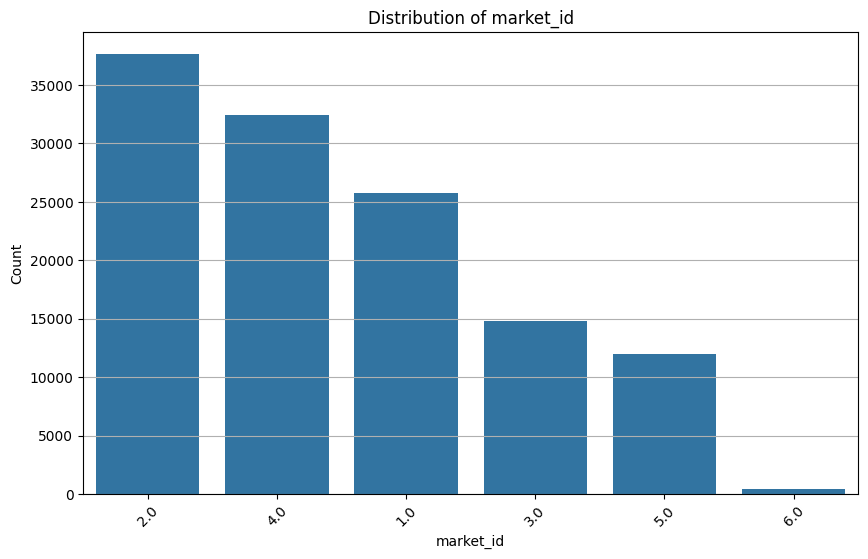

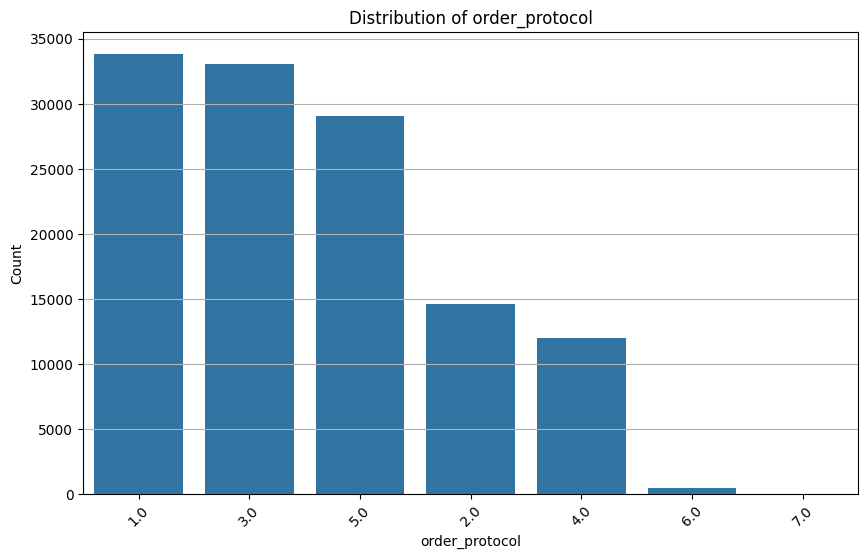

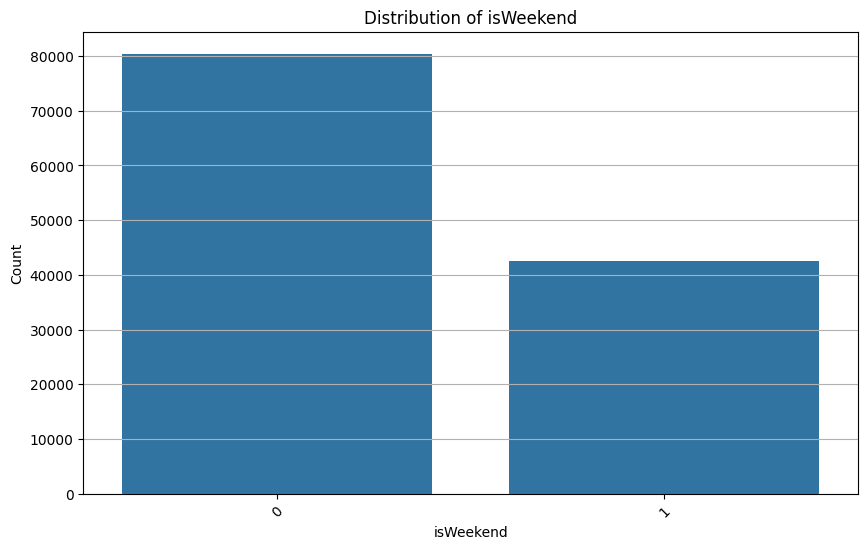

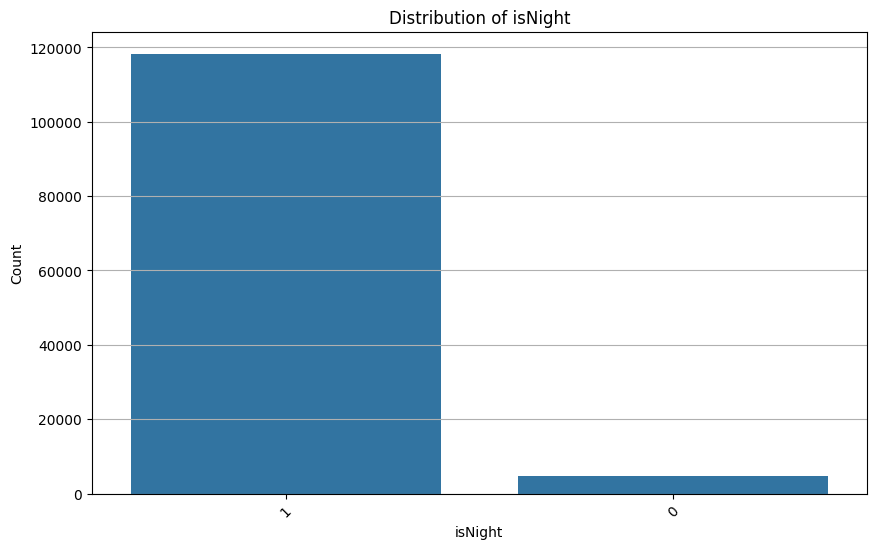

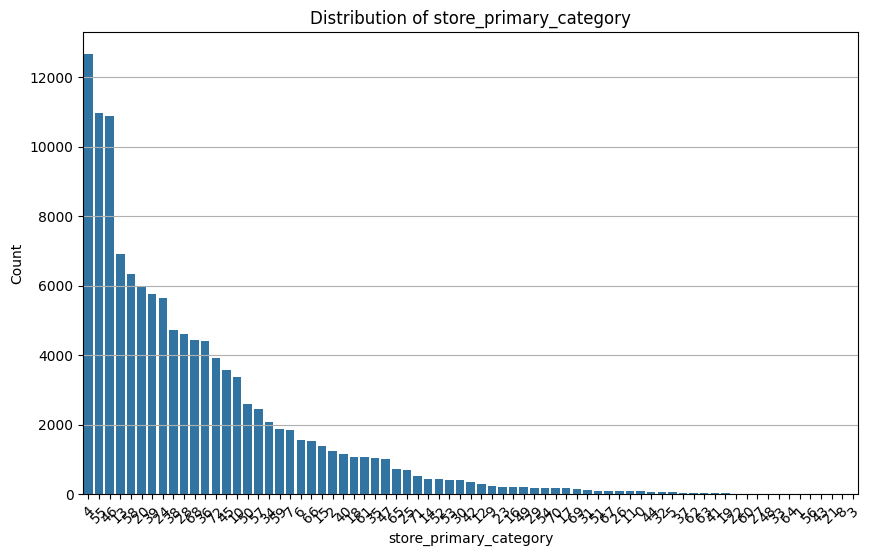

In [21]:
# Distribution of categorical columns

for col in categorical_cols:    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

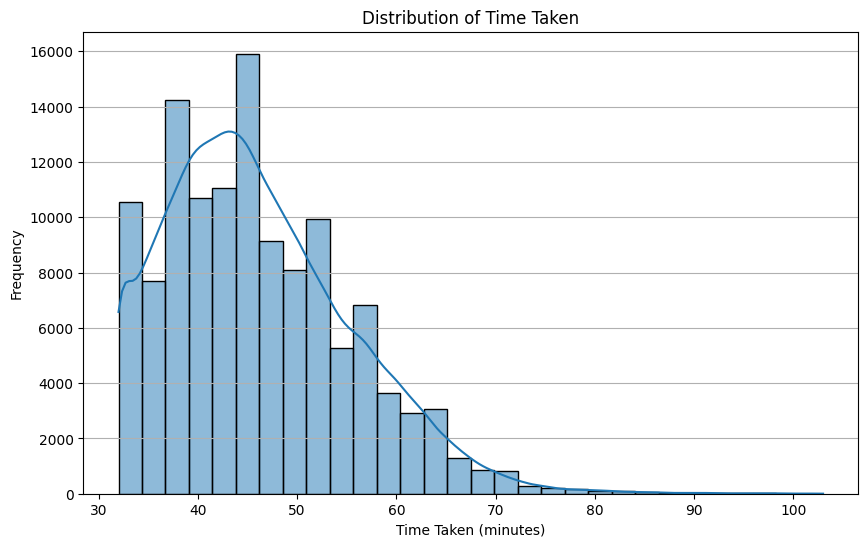

In [22]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
sns.histplot(train_df['time_taken'], bins=30, kde=True) 
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

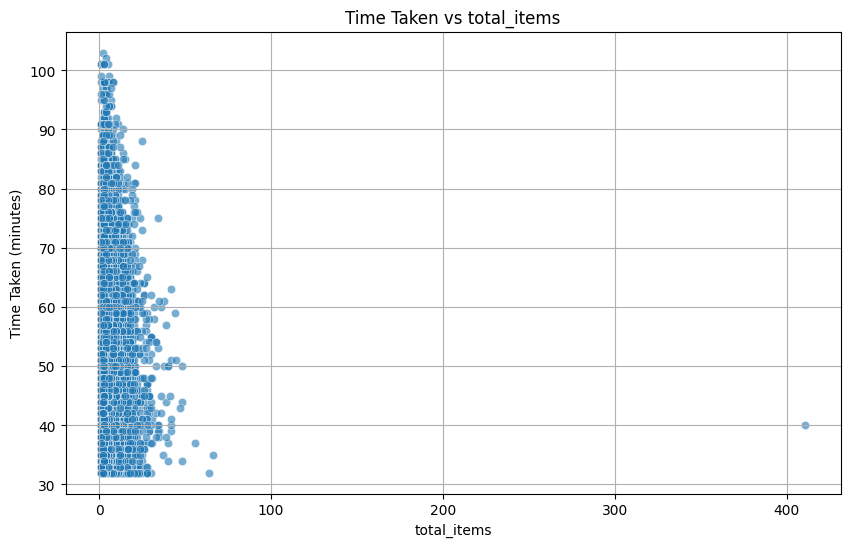

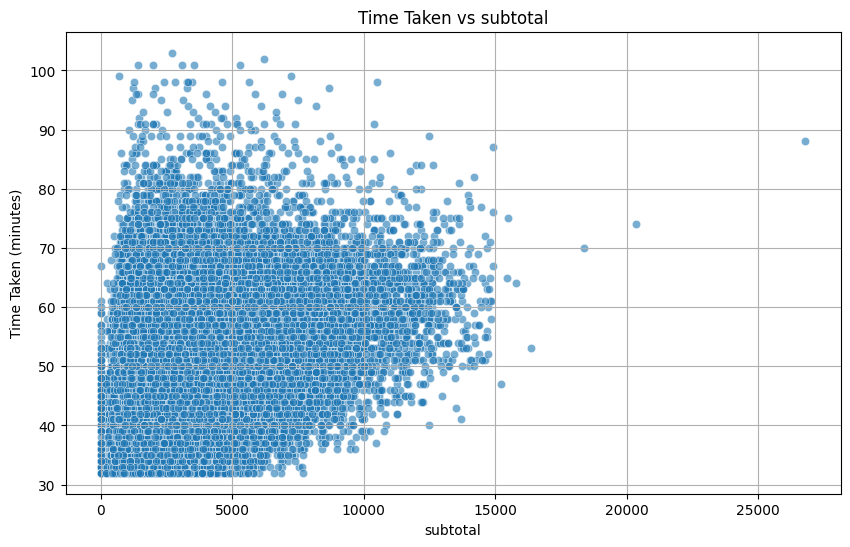

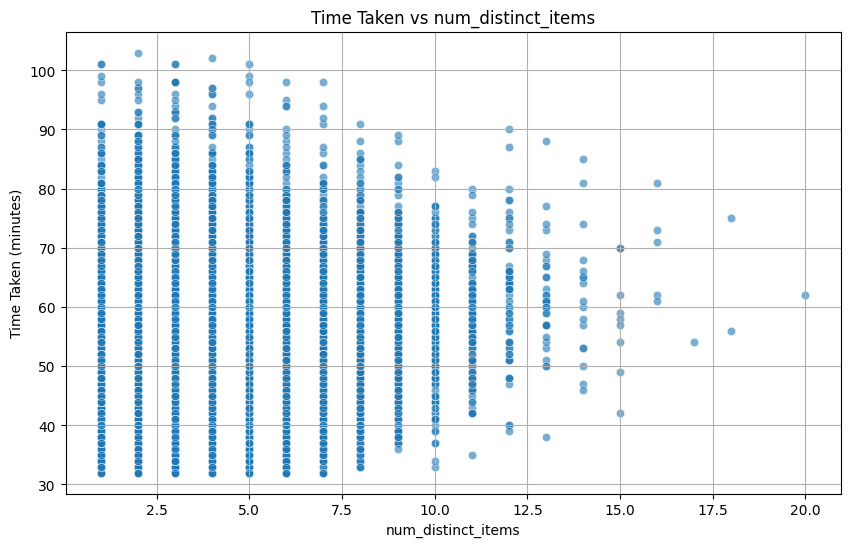

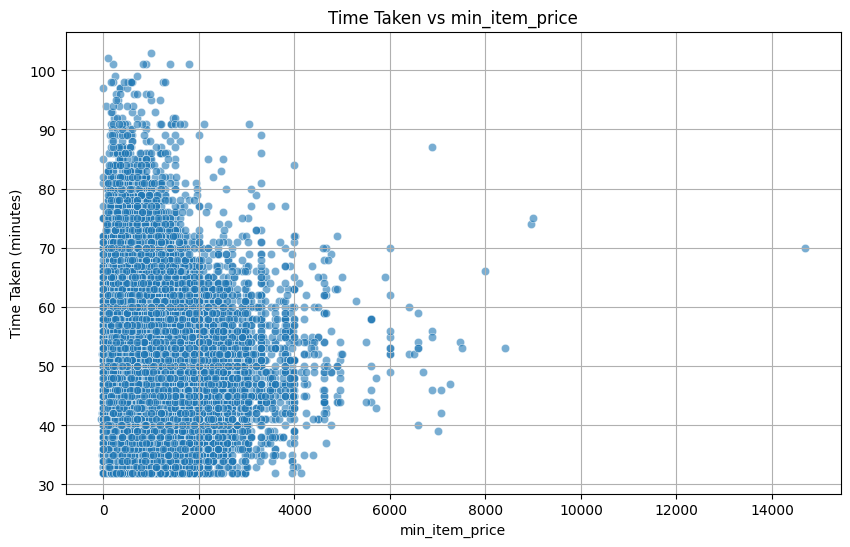

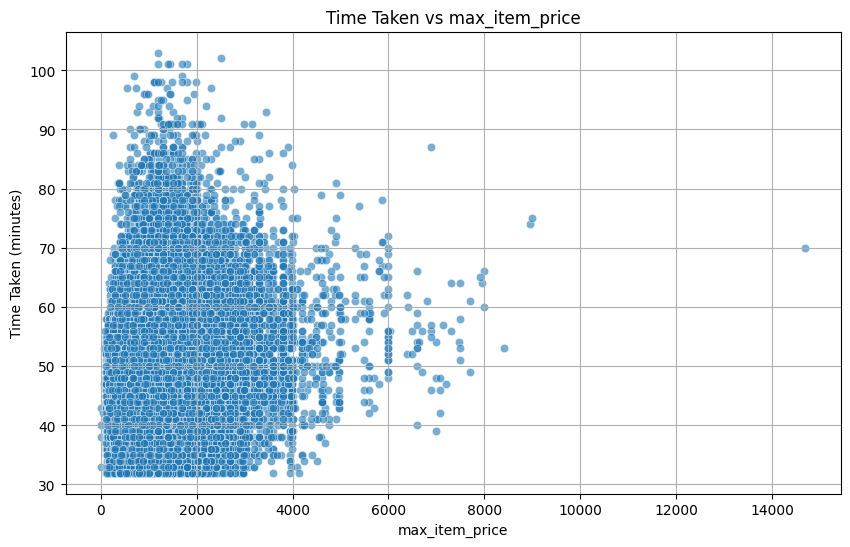

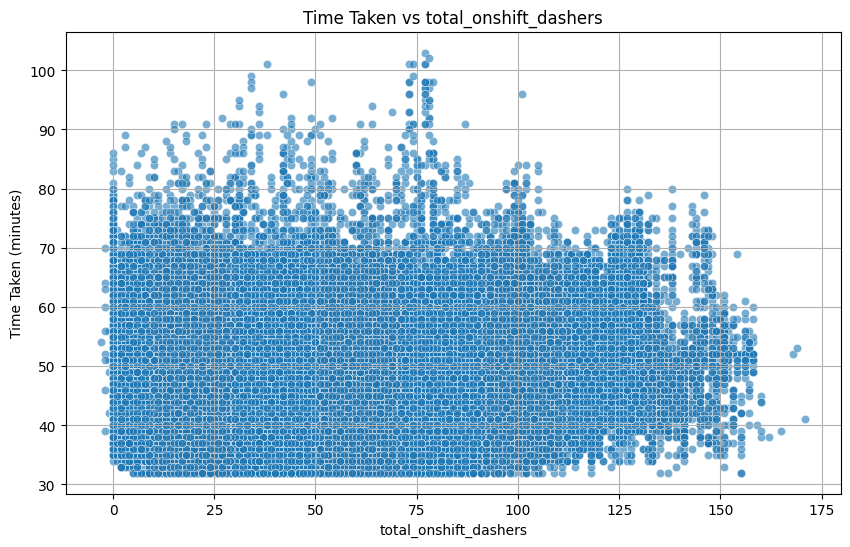

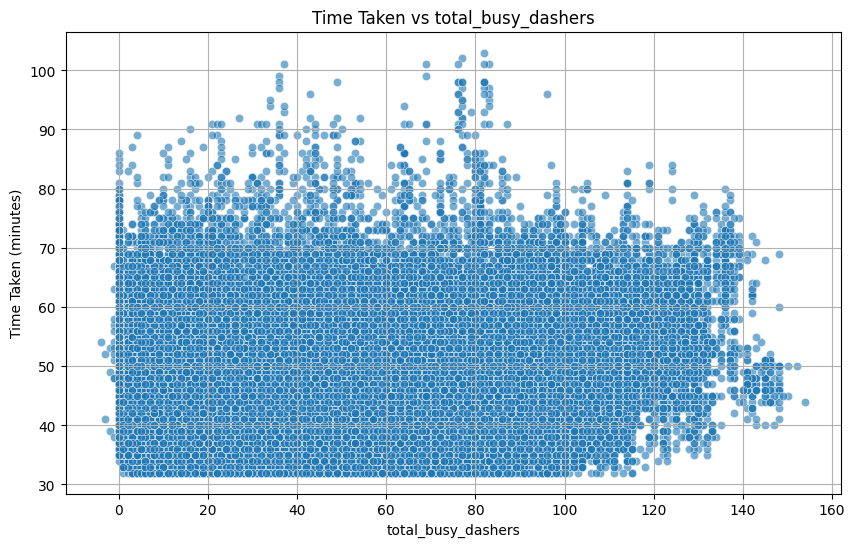

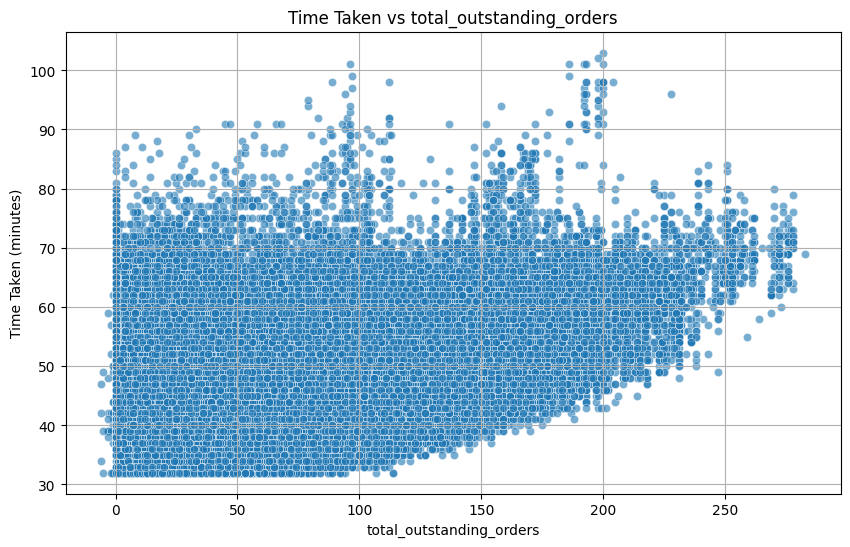

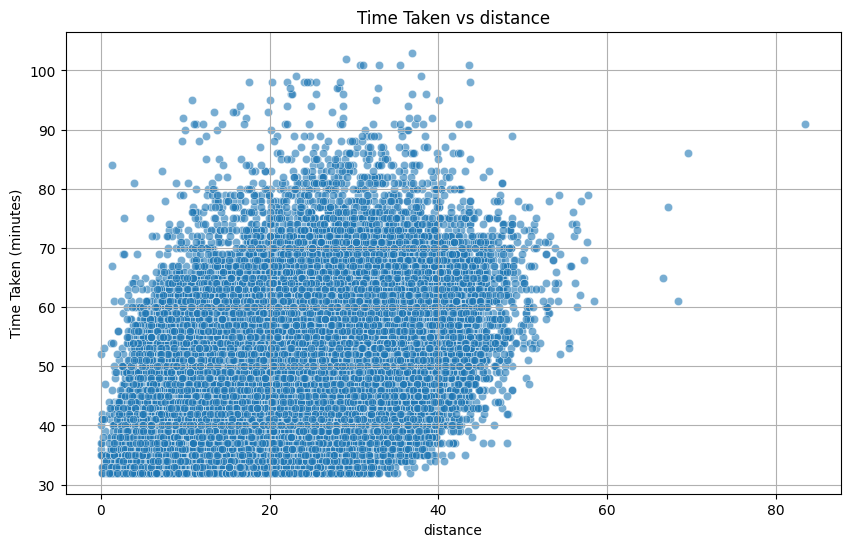

In [23]:
# Scatter plot to visualise the relationship between time_taken and other features

for col in numerical_cols[:-1]:  # Exclude 'time_taken' itself
    plt.figure(figsize=(10, 6))     
    sns.scatterplot(data=train_df, x=col, y='time_taken', alpha=0.6)
    plt.title(f'Time Taken vs {col}')
    plt.xlabel(col) 
    plt.ylabel('Time Taken (minutes)')
    plt.grid()
    plt.show()   

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

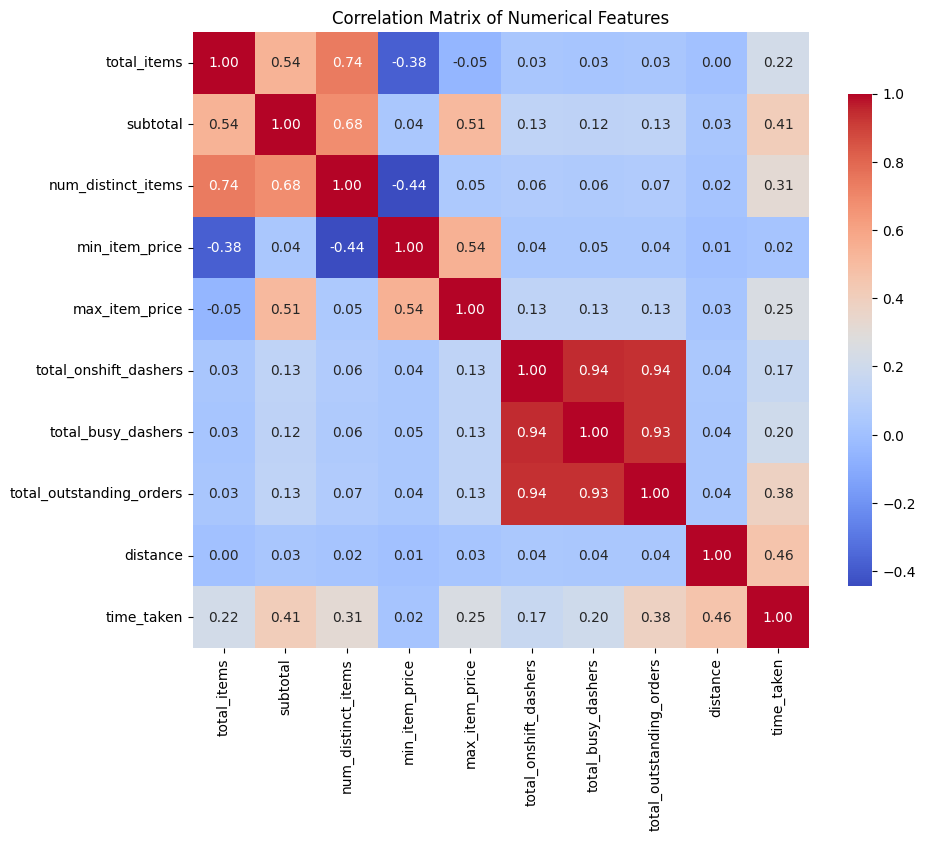

In [24]:
# Plot the heatmap of the correlation matrix

# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = train_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')           
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [25]:
# Drop 3-5 weakly correlated columns from training dataset
# Based on the correlation matrix, we can drop 'min_item_price' and 'max_item_price' as they are weakly correlated with 'time_taken'
correlations = train_df[numerical_cols].corrwith(train_df['time_taken']).abs()
weak_features = correlations[correlations <= 0.2].index.tolist()
print("Weakly correlated features to drop:", weak_features)

Weakly correlated features to drop: ['min_item_price', 'total_onshift_dashers']


In [26]:
# 3. Drop these from training and test sets
train_df = train_df.drop(columns=weak_features)
test_df = test_df.drop(columns=weak_features)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

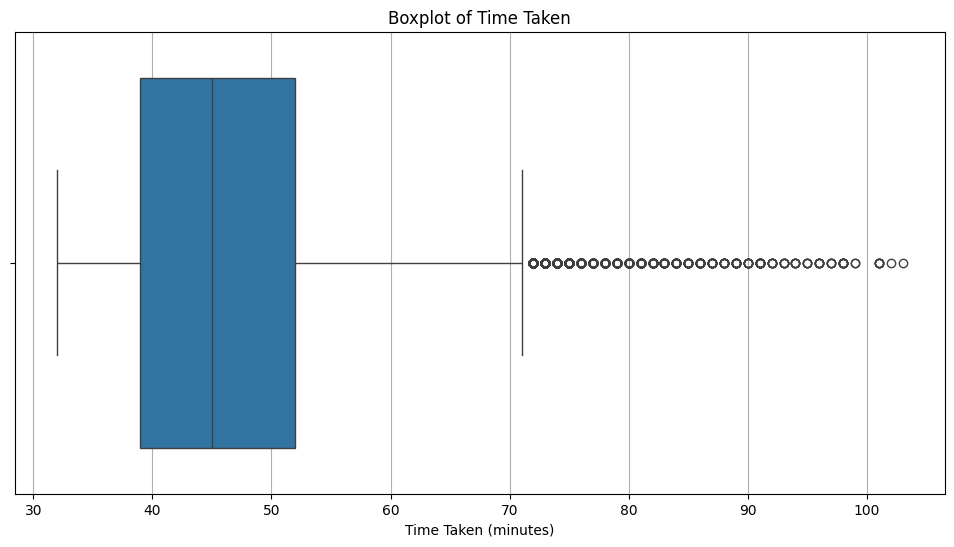

In [27]:
# Boxplot for time_taken

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='time_taken')
plt.title('Boxplot of Time Taken')
plt.xlabel('Time Taken (minutes)')  
plt.grid(axis='x')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [28]:
# Handle outliers

# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(train_df, column):        
    Q1 = train_df[column].quantile(0.25)  
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    lower_bound = max(lower_bound, 0)  # Ensure lower bound is not negative
    upper_bound = Q3 + 1.5 * IQR    
    train_df = train_df[(df[column] >= lower_bound) & (train_df[column] <= upper_bound)]
    return train_df



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [29]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error, r2_score


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns

X_train.head()

market_id  store_primary_category order_protocol  total_items  \
94746        4.0                      24            5.0            2   
173338       4.0                      72            5.0            1   
37592        4.0                      55            5.0            1   
42763        2.0                      28            4.0            6   
27506        2.0                      72            1.0            3   

        subtotal  num_distinct_items  min_item_price  max_item_price  \
94746       1790                   2             795             995   
173338       845                   1             795             795   
37592       1900                   1            1200            1200   
42763        463                   3               0             299   
27506       3500                   3             600            1200   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
94746                    10.0                 9.0                      15.0   
173338                  134.0                76.0                     136.0   
37592                    21.0                21.0                      28.0   
42763                    98.0                87.0                     129.0   
27506                     7.0                13.0                      17.0   

        distance  isWeekend  isNight  
94746      18.04          0        1  
173338     24.28          1        1  
37592      28.24          1        1  
42763      13.88          1        1  
27506       8.00          1        1

In [ ]:
# Make a copy of X_train before scaling for later comparison
X_train_unscaled = X_train.copy()
X_train_unscaled.head()

market_id  store_primary_category order_protocol  total_items  \
94746        4.0                      24            5.0            2   
173338       4.0                      72            5.0            1   
37592        4.0                      55            5.0            1   
42763        2.0                      28            4.0            6   
27506        2.0                      72            1.0            3   

        subtotal  num_distinct_items  min_item_price  max_item_price  \
94746       1790                   2             795             995   
173338       845                   1             795             795   
37592       1900                   1            1200            1200   
42763        463                   3               0             299   
27506       3500                   3             600            1200   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
94746                    10.0                 9.0                      15.0   
173338                  134.0                76.0                     136.0   
37592                    21.0                21.0                      28.0   
42763                    98.0                87.0                     129.0   
27506                     7.0                13.0                      17.0   

        distance  isWeekend  isNight  
94746      18.04          0        1  
173338     24.28          1        1  
37592      28.24          1        1  
42763      13.88          1        1  
27506       8.00          1        1

In [ ]:
# Remove 'time_taken' from numerical_cols if present
numerical_cols_to_scale = [col for col in numerical_cols if col != 'time_taken']
print("Numerical columns to scale:", numerical_cols_to_scale)
scaler = StandardScaler()


# Fit the scaler on the training data and transform both training and testing sets
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])
# Display the first few rows of the scaled training set
X_train[numerical_cols_to_scale].head()

# Check mean and std of scaled columns
for col in numerical_cols_to_scale:
    print(f"{col}: mean={X_train[col].mean():.2f}, std={X_train[col].std():.2f}")

# Compare a few values before and after scaling
for col in numerical_cols_to_scale:
    print(f"\nColumn: {col}")
    print("Unscaled values:", X_train_unscaled[col].head().values)
    print("Scaled values:  ", X_train[col].head().values)

Numerical columns to scale: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
total_items: mean=0.00, std=1.00
subtotal: mean=0.00, std=1.00
num_distinct_items: mean=-0.00, std=1.00
min_item_price: mean=0.00, std=1.00
max_item_price: mean=0.00, std=1.00
total_onshift_dashers: mean=0.00, std=1.00
total_busy_dashers: mean=-0.00, std=1.00
total_outstanding_orders: mean=0.00, std=1.00
distance: mean=-0.00, std=1.00

Column: total_items
Unscaled values: [2 1 1 6 3]
Scaled values:   [-0.43936925 -0.80366379 -0.80366379  1.01780893 -0.0750747 ]

Column: subtotal
Unscaled values: [1790  845 1900  463 3500]
Scaled values:   [-0.49601057 -1.01231057 -0.43591216 -1.22101597  0.43824657]

Column: num_distinct_items
Unscaled values: [2 1 1 3 3]
Scaled values:   [-0.41521505 -1.03039309 -1.03039309  0.19996299  0.19996299]

Column: min_item_price
Unscaled values: [ 795  795 1200

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model
model_lr = LinearRegression()

In [ ]:
# Train the model using the training data
model_lr.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 14.08
R-squared: 0.84
Model Coefficients:
                          Coefficient
market_id                   -0.663520
store_primary_category       0.005194
order_protocol              -0.745406
total_items                 -0.115780
subtotal                     2.348420
num_distinct_items           1.095103
min_item_price               0.124776
max_item_price               0.554858
total_onshift_dashers      -11.809065
total_busy_dashers          -4.785028
total_outstanding_orders    18.604949
distance                     4.177616
isWeekend                    1.010229
isNight                      0.751691


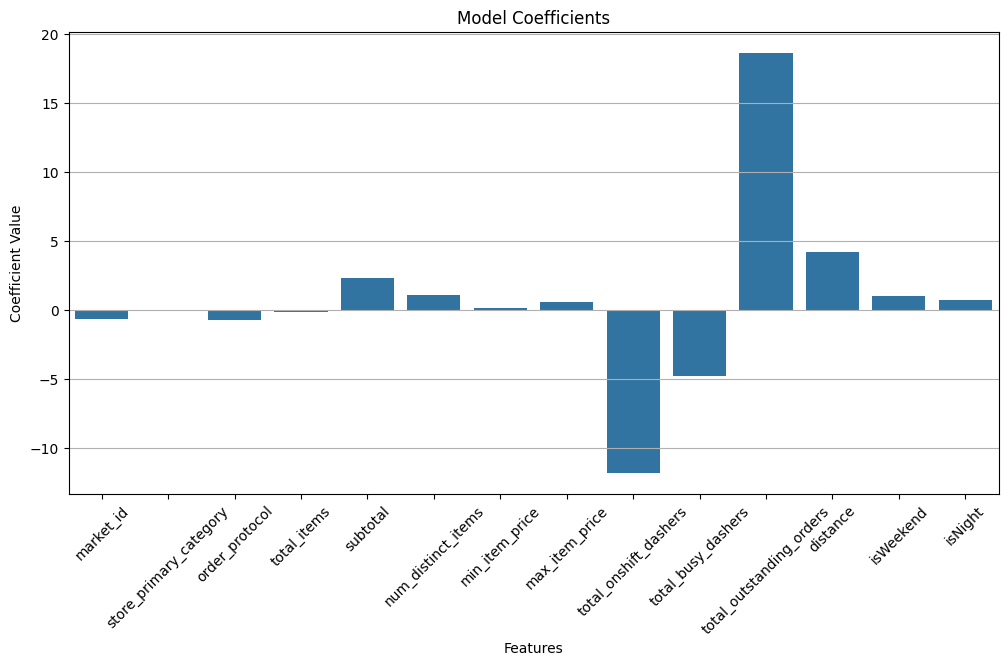

Text(0.5, 1.0, 'Actual vs Predicted Time Taken')

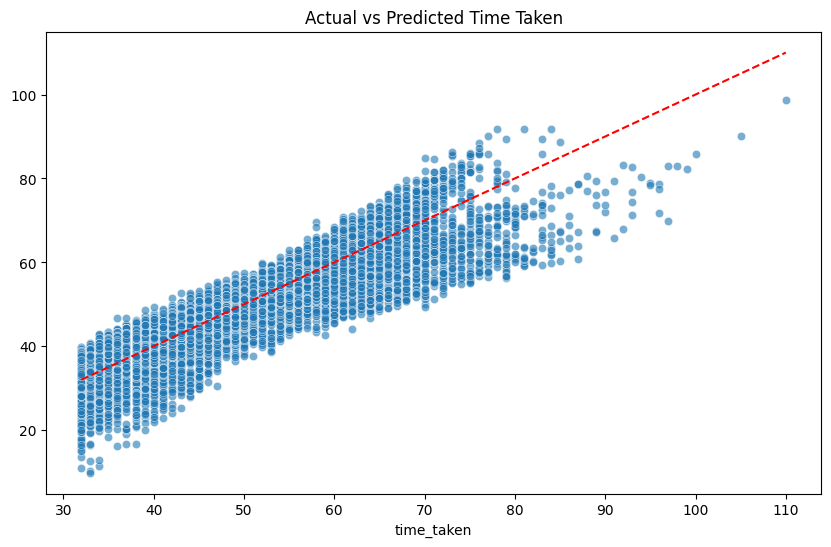

In [ ]:
# Generate predictions
y_pred = model_lr.predict(X_test)

# Find results for evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
# Display the coefficients of the model
coefficients = pd.DataFrame(model_lr.coef_, X_train.columns, columns=['Coefficient'])  
print("Model Coefficients:")
print(coefficients)
# Visualize the coefficients of the model
plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.title('Model Coefficients') 
plt.xlabel('Features')
plt.ylabel('Coefficient Value') 
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
# Visualize the predictions vs actual values
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Actual vs Predicted Time Taken') 


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
from sklearn.feature_selection import RFE

# Loop through the number of features and test the model
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

# Align columns in case get_dummies creates different columns in train/test
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

# Fit RFE with Linear Regression to select top 8 features
rfe_model = LinearRegression()
rfe_model = RFE(rfe_model, n_features_to_select=8)
rfe_model.fit(X_train_enc, y_train)

# Get the selected features
selected_features = X_train_enc.columns[rfe_model.support_]
print("Top 8 selected features:", selected_features.tolist())

Top 8 selected features: ['subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0']


In [ ]:
# Build the final model with selected number of features

X_train_rfe = X_train_enc[selected_features]
X_test_rfe = X_test_enc[selected_features]

# Train the model on selected features
rfe_model.fit(X_train_rfe, y_train)
y_pred = rfe_model.predict(X_test_rfe)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 13.70
R-squared: 0.84


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

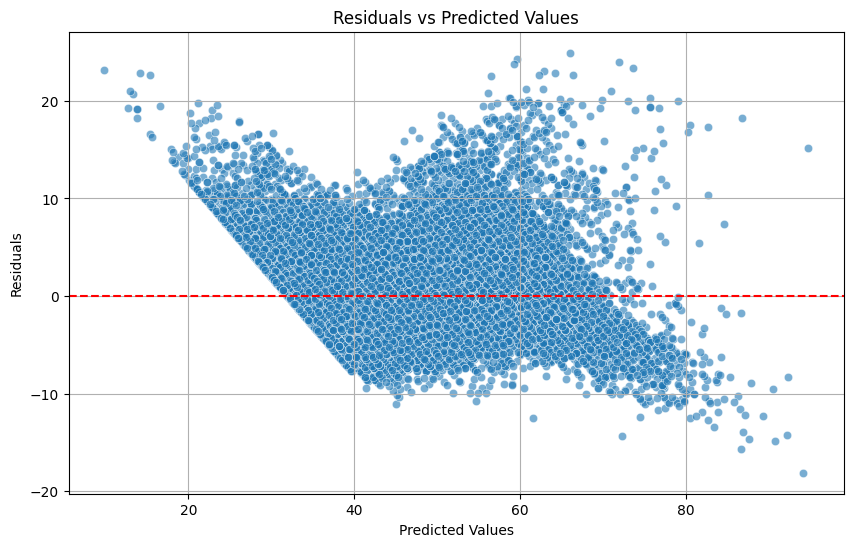

In [40]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residuals = y_test - y_pred
# Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

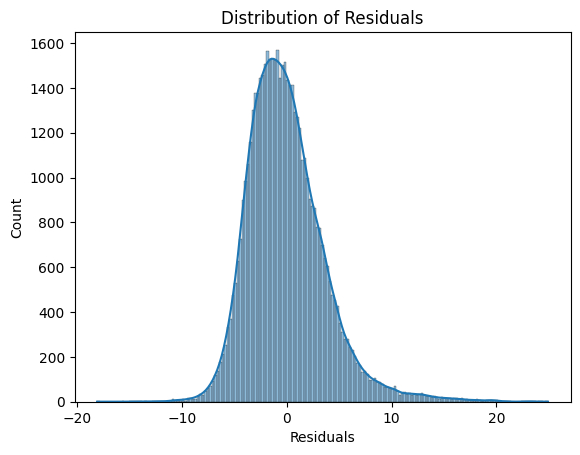

In [41]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

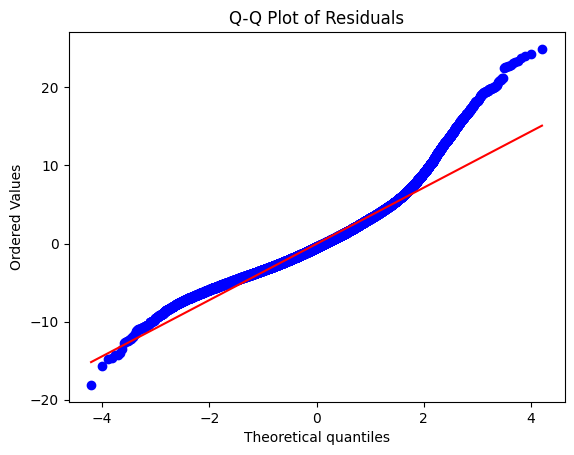

In [42]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [46]:
# Compare the scaled vs unscaled features used in the final model

from sklearn.preprocessing import StandardScaler
model_scaled = LinearRegression()
model_scaled.fit(X_train, y_train)

scaled_coeffs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient_scaled': model_scaled.coef_
})



model_unscaled = LinearRegression()
model_unscaled.fit(X_train_unscaled , y_train)

unscaled_coeffs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient_unscaled': model_unscaled.coef_
})


coeff_compare = pd.merge(scaled_coeffs, unscaled_coeffs, on='Feature')
print(coeff_compare.sort_values(by='Coefficient_scaled', ascending=False))

                     Feature  Coefficient_scaled  Coefficient_unscaled
10  total_outstanding_orders           18.604949              0.353106
11                  distance            4.177616              0.476625
4                   subtotal            2.348420              0.001283
5         num_distinct_items            1.095103              0.673683
12                 isWeekend            1.010229              1.010229
13                   isNight            0.751691              0.751691
7             max_item_price            0.554858              0.000986
6             min_item_price            0.124776              0.000240
1     store_primary_category            0.005194              0.005194
3                total_items           -0.115780             -0.042178
0                  market_id           -0.663520             -0.663520
2             order_protocol           -0.745406             -0.745406
9         total_busy_dashers           -4.785028             -0.148837
8     

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

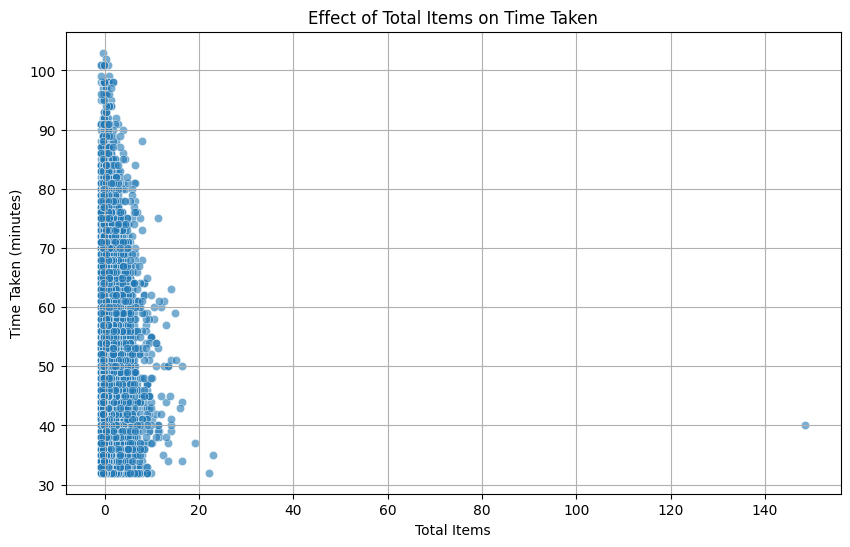

In [47]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# When the number of items increases by 1 standard deviation, the predicted target decreases by 0.116 units. This indicates that as the number of items increases, the time taken for delivery slightly decreases, which could be due to more efficient routing or bundling of items.
# Visualize the effect of a unit change in 'total_items' on the predicted target variable   
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['total_items'], y=y_train, alpha=0.6)
plt.title('Effect of Total Items on Time Taken')
plt.xlabel('Total Items')
plt.ylabel('Time Taken (minutes)')
plt.grid()
plt.show()



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>  Yes, there are categorical variables in the data. The categorical variables identified are: `market_id`, `order_protocol`, `isWeekend`, `isNight`, and `store_primary_category`.

From the analysis:
- `market_id` and `order_protocol` were originally categorical and were one-hot encoded for modeling.
- `isWeekend` and `isNight` are binary categorical features indicating whether the order was placed on a weekend or at night.
- `store_primary_category` is an integer-coded categorical variable representing the primary category of the store.

**Inference about their effect on the dependent variable (`time_taken`):**
- The coefficients from the linear regression model show that these categorical variables do have an effect on delivery time.
- For example, different `market_id` and `order_protocol` values (as seen in their dummy variables) have non-zero coefficients, indicating they influence `time_taken`.
- `isWeekend` and `isNight` also have positive coefficients, suggesting that deliveries on weekends or at night tend to take longer.
- The effect of `store_primary_category` is relatively small, but it still contributes to the model.

Overall, categorical variables help capture differences in delivery time that are not explained by numerical features alone.         



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>`test_size = 0.2` means that 20% of the dataset will be used as test set, while the remaining 80% will be used as the training set. This allows us to evaluate the model's performance on unseen data.

---

##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>From the heatmap of the correlation matrix (see section 3.3.1), the feature with the highest correlation with the target variable `time_taken` is `distance`. This indicates that the distance to be covered for delivery is the most strongly related to the time taken for delivery among all the features.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
>To detect outliers, I used boxplots and the Interquartile Range (IQR) method. Boxplots (see section 3.4.1) visually highlighted potential outliers in the target variable and other numerical features. For addressing outliers, I implemented a function that removes data points lying outside 1.5 times the IQR from the first and third quartiles (see section 3.4.2). This approach helps to reduce the influence of extreme values and ensures the integrity of the analysis.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the final model with Recursive Feature Elimination (RFE), the top 3 features significantly affecting the delivery time are:
>
>1. `distance` – This feature has the strongest positive correlation with `time_taken`, indicating that longer distances lead to higher delivery times.
>2. `total_outstanding_orders` – A higher number of outstanding orders is associated with increased delivery time, likely due to increased workload and delays.
>3. `total_busy_dashers` – The number of busy dashers also impacts delivery time, as more busy dashers can mean fewer available for new deliveries, leading to longer wait times.
>
>These features were consistently selected by RFE and have the largest coefficients in the final model, highlighting their significant impact on delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>It is used to model the relationship between a dependent variable (target) and one or more independent variables (features)
>It is used for prediction, trend analysis and understanding relationship between variables
>Linear Regression computes : `y = β₀ + β₁x + ε`  
Multiple Linear Regression computes : `y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε`
Each coefficient represents the expected change in the target variable for a one-unit change in the corresponding feature, holding other features constant.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> simple linear Regression uses onle one predictor variable. 
multple linear Regression uses two or more predictors. It helps to capture more complex relationship by considering the combined effect of several features.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>It measures how well the model's predictions match the actual data. The most common cost function is the Mean Squared Error (MSE), which calculates the average of the squared differences between predicted and actual values. The goal of linear regression is to find the model parameters (coefficients) that minimize this cost function. Minimization is typically done using optimization algorithms such as Gradient Descent or by solving the normal equations analytically. By minimizing the cost function, the model achieves the best possible fit to the training data.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>overfitting means the model is too complex and memorizes the data, while underfitting means the model is too simple and misses important patterns.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are used to assess the quality of a linear regression model by visualizing the residuals (the differences between actual and predicted values) against the predicted values or independent variables.
>
>- If the residuals are randomly scattered around zero with no clear pattern, it suggests that the linear model is appropriate and the assumptions of linearity and homoscedasticity (constant variance) are met.
>- If there is a pattern (such as a curve or funnel shape), it indicates that the model may not be capturing some aspect of the data (e.g., non-linearity, heteroscedasticity, or missing variables).
>- Outliers or clusters in the residual plot can highlight influential data points or violations of model assumptions.
>
>In summary, residual plots help diagnose issues like non-linearity, unequal error variances, and outliers, guiding improvements to the regression model.